## Exploratory Data Analysis

In [18]:
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# set root directory
path_root = Path("C:/Users/giann/data-science-core")
os.chdir(path_root)
print(f'- Root directory = {os.getcwd()}')

- Root directory = C:\Users\giann\data-science-core


In [7]:
# import dataset
path_dataset = path_root / 'dataset/box-plot-education/TrainingData.csv'
data  = pd.read_csv(path_dataset, index_col = 0)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400277 entries, 134338 to 415831
Data columns (total 25 columns):
Function                  400277 non-null object
Use                       400277 non-null object
Sharing                   400277 non-null object
Reporting                 400277 non-null object
Student_Type              400277 non-null object
Position_Type             400277 non-null object
Object_Type               400277 non-null object
Pre_K                     400277 non-null object
Operating_Status          400277 non-null object
Object_Description        375493 non-null object
Text_2                    88217 non-null object
SubFund_Description       306855 non-null object
Job_Title_Description     292743 non-null object
Text_3                    109152 non-null object
Text_4                    53746 non-null object
Sub_Object_Description    91603 non-null object
Location_Description      162054 non-null object
FTE                       126071 non-null float64
Func

In [10]:
data.head().transpose()

,134338,206341,326408,364634,47683
Function,Teacher Compensation,NO_LABEL,Teacher Compensation,Substitute Compensation,Substitute Compensation
Use,Instruction,NO_LABEL,Instruction,Instruction,Instruction
Sharing,School Reported,NO_LABEL,School Reported,School Reported,School Reported
Reporting,School,NO_LABEL,School,School,School
Student_Type,NO_LABEL,NO_LABEL,Unspecified,Unspecified,Unspecified
Position_Type,Teacher,NO_LABEL,Teacher,Substitute,Teacher
Object_Type,NO_LABEL,NO_LABEL,Base Salary/Compensation,Benefits,Substitute Compensation
Pre_K,NO_LABEL,NO_LABEL,Non PreK,NO_LABEL,NO_LABEL
Operating_Status,PreK-12 Operating,Non-Operating,PreK-12 Operating,PreK-12 Operating,PreK-12 Operating
Object_Description,NaN,CONTRACTOR SERVICES,Personal Services - Teachers,EMPLOYEE BENEFITS,TEACHER COVERAGE FOR TEACHER


### Summarizing the data
There are two numeric columns, called `FTE` and `Total`:
- `FTE`: stands for "full-time equivalent". If the budget item is associated to an employee, this number tells us the percentage of full-time that the employee works. A value of 1 means the associated employee works for the school full-time. A value close to 0 means the item is associated to a part-time or contracted employee.
- `Total`: Stands for the total cost of the expenditure. This number tells us how much the budget item cost.

In [20]:
# Print the summary statistics
data.loc[np.logical_or(data['FTE'] > 1, data['FTE'] < 0) ,'FTE'] = np.nan # remove outliers
print(data.describe())

                 FTE         Total
count  122952.000000  3.957220e+05
mean        0.406381  1.310586e+04
std         0.447964  3.682254e+05
min         0.000000 -8.746631e+07
25%         0.000000  7.379770e+01
50%         0.100000  4.612300e+02
75%         1.000000  3.652662e+03
max         1.000000  1.297000e+08


The high variance in expenditures makes sense (some purchases are cheap some are expensive).

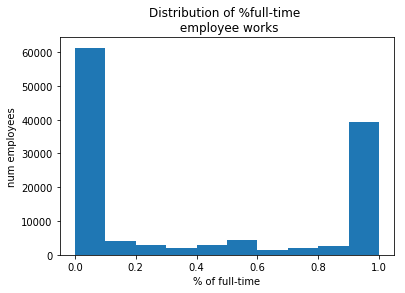

In [21]:
# Create the histogram
plt.hist(data['FTE'].dropna())
plt.title('Distribution of %full-time \n employee works')
plt.xlabel('% of full-time')
plt.ylabel('num employees')
plt.show()

It looks like the `FTE` column is bimodal. That is, there are some part-time and some full-time employees.

### Exploring datatypes
identify the *slow* `object` data types. 

In [24]:
data.dtypes.value_counts()

object     23
float64     2
dtype: int64

There are 23 object features.

### Encode the labels as categorical variables
your ultimate goal is to predict the probability that a certain label is attached to a budget line item. You just saw that many columns in your data are the inefficient `object` type. Does this include the labels you're trying to predict? There are 9 columns of labels in the dataset. Each of these columns is a category that has many possible values it can take. The 9 labels have been loaded into a list called LABELS.

In [26]:
LABELS = ['Function', 'Use', 'Sharing', 'Reporting', 'Student_Type', 'Position_Type', 'Object_Type', 'Pre_K', 'Operating_Status']

In [28]:
# Define the lambda function: categorize_label
categorize_label = lambda x: x.astype('category')
# Convert df[LABELS] to a categorical type
data[LABELS] = data[LABELS].apply(categorize_label, axis = 0)
# Print the converted dtypes
print(data[LABELS].dtypes)

Function            category
Use                 category
Sharing             category
Reporting           category
Student_Type        category
Position_Type       category
Object_Type         category
Pre_K               category
Operating_Status    category
dtype: object


### Counting unique labels
There are over **100 unique labels**. Lwet us explore this fact by counting and plotting the number of unique values for each category of label.

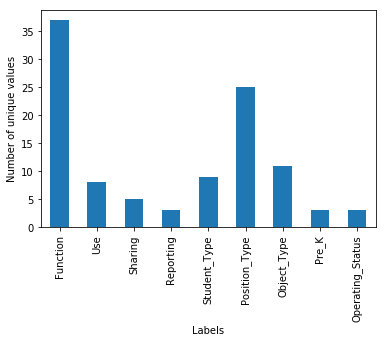

In [30]:
num_unique_labels = data[LABELS].apply(pd.Series.nunique)
num_unique_labels.plot(kind = 'bar')
plt.xlabel('Labels')
plt.ylabel('Number of unique values')
plt.show()

### Log loss as metric. 
For multi label classification let us use the **log loss function**

In [39]:
def compute_log_loss(predicted, actual, eps=1e-14):
    """ Computes the logarithmic loss between `predicted` and `actual` when these are 1D arrays.
    """
    predicted = np.clip(predicted, eps, 1 - eps)    
    return -1 * np.mean(actual * np.log(predicted) + (1 - actual) * np.log(1 - predicted))

print(f"- Log loss with more confident prediction and wrong: L1 = {compute_log_loss(predicted = 0.9, actual = 0)}")
print(f"- Log loss with less confident but right: L2 = {compute_log_loss(predicted = 0.5, actual = 1)}")

- Log loss with more confident prediction and wrong: L1 = 2.302585092994046
- Log loss with less confident but right: L2 = 0.6931471805599453
